In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 10 12:13:45 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distirbuted solution with agent failure probability $p$

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
fail_probability = [0, 0.05, 0.1]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=2337.9518941342703, L=-20000.0, U=-8.550838540184134


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=1, rel_gap=8.76798227845176, L=-83.52443932642093, U=-8.550838540184134
k=2, rel_gap=5.49738966510302, L=-83.52443932629618, U=-12.855076212359483
k=3, rel_gap=1.0057258232028556, L=-82.33967202699912, U=-41.05230688784498
k=4, rel_gap=0.550867936456697, L=-82.33967202699493, U=-53.092639348207975
k=5, rel_gap=0.3346888842322536, L=-82.33967202701456, U=-61.69203400115106
k=6, rel_gap=0.21847039530779205, L=-82.33967202700046, U=-67.57625982878396
k=7, rel_gap=0.15683165953206157, L=-82.33967202699887, U=-71.17688329891081
k=8, rel_gap=0.10810870927836944, L=-81.2254105404198, U=-73.3009404766036
k=9, rel_gap=0.07526014225325516, L=-80.9983739717056, U=-75.32909552656712
k=10, rel_gap=0.0527813124037072, L=-80.99837397176184, U=-76.9375111596791
k=11, rel_gap=0.03758938294489859, L=-80.81424284431827, U=-77.88653601576986
k=12, rel_gap=0.028094679744276884, L=-80.62674560145624, U=-78.42346350971384
k=13, rel_gap=0.016876745186857094, L=-80.49305401069729, U=-79.15713914364933
k=14, 

k=6, rel_gap=5.405227320775969, L=-82.33967202699863, U=-12.85507412983174
k=7, rel_gap=0.7670439687963844, L=-82.33967202654628, U=-46.5974098440978
k=8, rel_gap=0.38783571542108813, L=-82.33967202678757, U=-59.3295525629304
k=9, rel_gap=0.37156257971497203, L=-81.37419416654785, U=-59.3295525629304
k=10, rel_gap=0.20100155274628212, L=-81.27125815946788, U=-67.66956959683203
k=11, rel_gap=0.20100155274666578, L=-81.27125815949384, U=-67.66956959683203
k=12, rel_gap=0.19962835289560957, L=-81.17833431660243, U=-67.66956959683203
k=13, rel_gap=0.19962835289586914, L=-81.17833431662, U=-67.66956959683203
k=14, rel_gap=0.19506655625104463, L=-80.86963950107645, U=-67.66956959683203
k=15, rel_gap=0.19158470975287714, L=-80.63402444714322, U=-67.66956959683203
k=16, rel_gap=0.1915847097540288, L=-80.63402444722115, U=-67.66956959683203
k=17, rel_gap=0.1915847097550446, L=-80.63402444728989, U=-67.66956959683203
k=18, rel_gap=0.19158470998950627, L=-80.63402446315581, U=-67.66956959683203
k

# Centralized solution

In [5]:
h_cvx = ob.cvx_multi_commodity_flow(params=params)[2]

# Plot

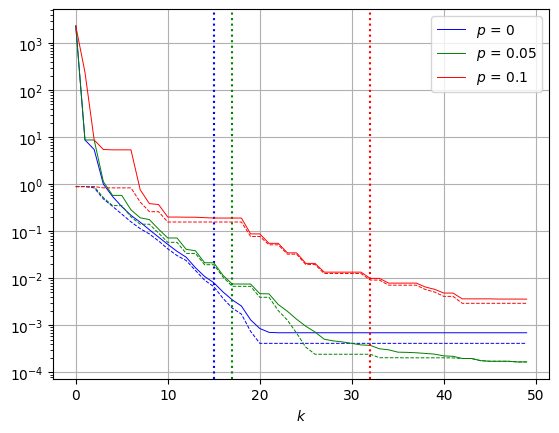

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)